In [1]:
iris = sns.load_dataset("iris")
iris

NameError: name 'sns' is not defined

In [ ]:
sns.pairplot(iris)

In [ ]:
iris[iris["sepal_width"]>4]

In [ ]:
iris[iris["petal_width"]>1]

In [ ]:
iris[iris["petal_width"]>2]

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
sns.scatterplot(x="sepal_length",y = "petal_length",data = iris,hue="species")
plt.show

In [ ]:
y=iris[["sepal_length"]]


In [ ]:
x=iris[["sepal_width"]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
x_train.head()

In [ ]:
y_train.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred = lr.predict(x_test)
y_pred

In [ ]:
y_test.head()

In [ ]:
y_pred[0:5]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
# model_2

In [ ]:
y = iris[["sepal_length"]]

In [ ]:
x=iris[["sepal_width","petal_length","petal_width"]]

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

In [ ]:
lr2 = LinearRegression()

In [ ]:
lr2.fit(x_train,y_train)

In [ ]:
y_pred = lr2.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_pred)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color =sns.color_palette()
import warnings
warnings.filterwarnings("ignore")

In [3]:
default = pd.read_csv("Default_Fin.csv")
default.head()


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
default.shape

(10000, 5)

In [5]:
default.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


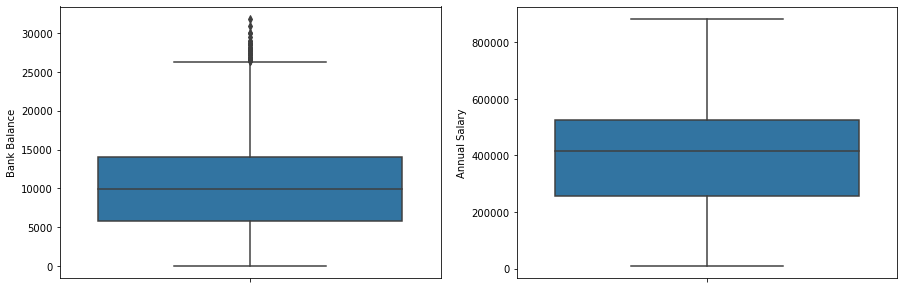

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=default["Bank Balance"])

plt.subplot(1,2,2)
sns.boxplot(y=default["Annual Salary"])
plt.show()

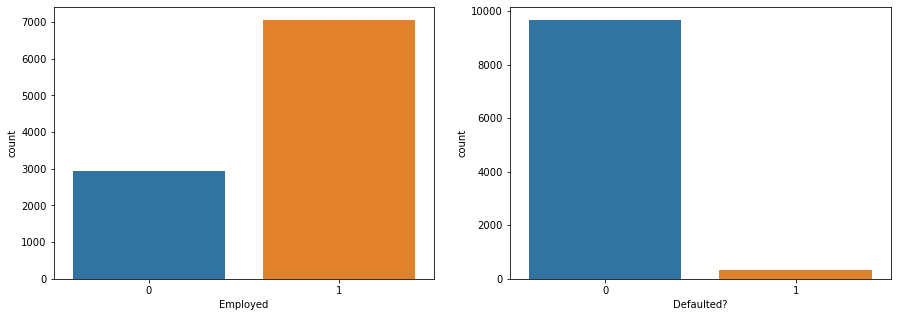

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(default["Employed"])

plt.subplot(1,2,2)
sns.countplot(default["Defaulted?"])
plt.show()

In [8]:
default["Employed"].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [9]:
default["Defaulted?"].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [10]:
default["Employed"].value_counts(normalize =True)

1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [11]:
default["Defaulted?"].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

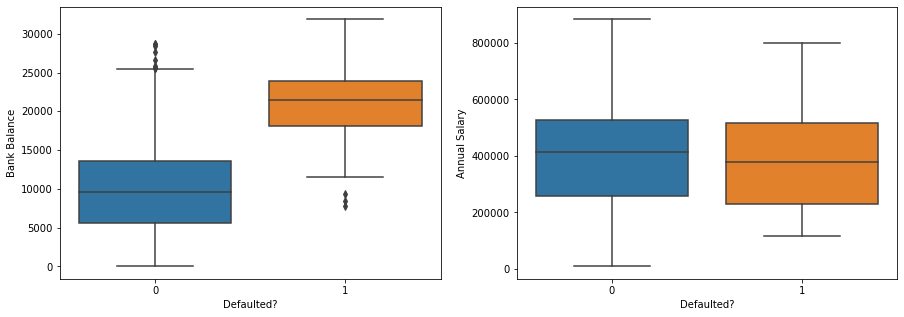

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(default["Defaulted?"],default["Bank Balance"])

plt.subplot(1,2,2)
sns.boxplot(default["Defaulted?"],default["Annual Salary"])
plt.show()

<AxesSubplot:>

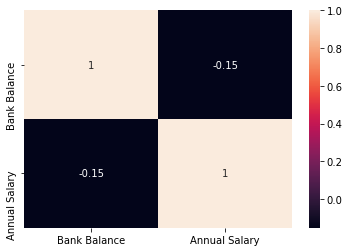

In [13]:
sns.heatmap(default[["Bank Balance","Annual Salary"]].corr(),annot = True)

In [14]:
default.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [15]:
Q1,Q3 = default["Bank Balance"].quantile([.25,.75])
IQR = Q3-Q1
LL = Q1-1.5*(IQR)
UL = Q3+1.5*(IQR)

In [16]:
UL

26317.964999999997

In [17]:
LL

-6541.5149999999985

In [18]:
df = default[default["Bank Balance"] > UL]
df.count()

Index            31
Employed         31
Bank Balance     31
Annual Salary    31
Defaulted?       31
dtype: int64

In [19]:
#setting >ul to ul
default["Bank Balance"]= np.where(default["Bank Balance"]>UL,UL,default["Bank Balance"])

<AxesSubplot:ylabel='Bank Balance'>

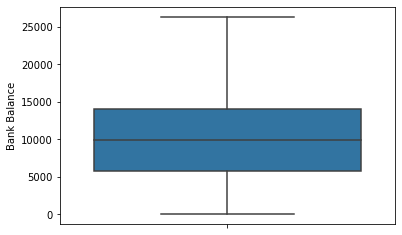

In [20]:
sns.boxplot(y=default["Bank Balance"])

In [21]:
# converting categorical values to numerical values
# default = pd.get_dumies(default,drop_first=True)

In [22]:
default.colums = []

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = default.drop(["Defaulted?", "Index"],axis = 1)

In [25]:
X.head()

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00


In [26]:
y = default["Defaulted?"]

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 20,stratify = y)

In [29]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33,sampling_strategy = 0.75)
X_res,y_res = sm.fit_resample(X_train,y_train)


In [47]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_res,y_res)

LogisticRegression()

In [52]:
y_pred = lr.predict(X_test)


In [57]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [55]:
y_test.head(10)

7132    0
9434    0
5117    0
6727    0
900     0
4628    0
9287    0
966     0
26      0
1236    0
Name: Defaulted?, dtype: int64

In [58]:
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
confusion_matrix(y_test,y_pred)

array([[2098,  802],
       [  23,   77]])

In [60]:
(2098+77)/(2098+802+23+77)

0.725